<a href="https://colab.research.google.com/github/raviyk/recipes/blob/master/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [22]:
#Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [14]:
N, D = X_train.shape

In [15]:
print(N, D)

381 30


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
type(X_test)

numpy.ndarray

In [25]:
#Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape = (D, )), 
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Train the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 0.6639 - accuracy: 0.6299 - val_loss: 0.6249 - val_accuracy: 0.6596
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6033 - accuracy: 0.6745 - val_loss: 0.5631 - val_accuracy: 0.7340
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5512 - accuracy: 0.7402 - val_loss: 0.5098 - val_accuracy: 0.7606
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7874 - val_loss: 0.4664 - val_accuracy: 0.7766
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.8294 - val_loss: 0.4294 - val_accuracy: 0.8085
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4339 - accuracy: 0.8425 - val_loss: 0.3996 - val_accuracy: 0.8298
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8530 - val_loss: 0.3728 - val_accuracy: 0.8511
Epoch 8/100


In [26]:
print('Train score: ', model.evaluate(X_train, y_train))
print('Test score: ', model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9738
Train score:  [0.09490320086479187, 0.9737532734870911]
6/6 [==============================] - 0s 1ms/step - loss: 0.0992 - accuracy: 0.9574
Test score:  [0.09921721369028091, 0.957446813583374]


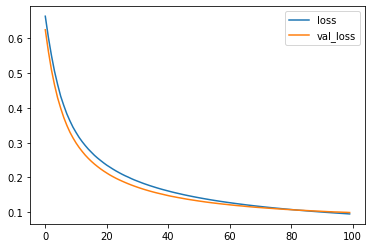

In [28]:
#Plot loss and accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

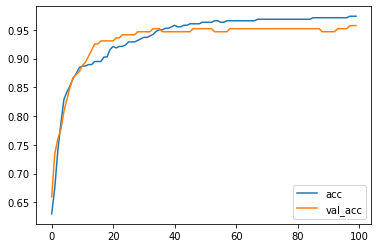

In [32]:
#Accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()